In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd /home/htc/khiroshi/SCRATCH/transformer-border

/scratch/htc/khiroshi/transformer-border


### Loading border basis dataset 

In [33]:
import os
from pathlib import Path
from src.loader.data import load_data
from src.loader.data_format.processors.base import ProcessorChain
from src.loader.tokenizer import set_vocab, set_tokenizer

# load config
import yaml
with open('config/problems/prod.yaml', 'r') as f:
    config = yaml.safe_load(f)

# set up vocab and tokenizer
vocab = set_vocab(
    num_vars=config['ring']['num_variables'],
    field=f"{config['field']['type']}{config['field']['param']}",
    max_coeff=config['polynomial']['coefficient']['max'],
    max_degree=20
)
tokenizer = set_tokenizer(vocab, max_seq_length=1000)

_processors = []
# separator, supersparator = ' [SEP] ', ' [BIGSEP] '
# _processors.append(ExtractKLeadingTermsProcessor(num_leading_terms_F, num_leading_terms_V, separator=separator, supersparator=supersparator))

subprocessors = {}
data_collator_name = 'monomial'
from src.loader.data_format.processors.subprocessors import MonomialProcessorPlus
subprocessors['monomial_ids'] = MonomialProcessorPlus(
            num_variables=config['ring']['num_variables'],
            max_degree=20,
            max_coef=31  # 'GF7' -> 7
        )

processor = ProcessorChain(_processors) 

# data path
# train_data_path = f"./data/poly/GF31_n={config['ring']['num_variables']}/train"
# test_data_path  = f"./data/poly/GF31_n={config['ring']['num_variables']}/test"
test_data_path = f"/home/htc/khiroshi/SCRATCH/transformer-border/data/prod/GF31_n=3/test"

# load datasets
# train_dataset, data_collator = load_data(
#     data_path=train_data_path,
#     splits=[{"name": "train", "batch_size": 32, "shuffle": False}],
#     tokenizer=tokenizer,
#     return_dataloader=False
# )

test_dataset, data_collator = load_data(
    data_path=test_data_path,
    splits=[{"name": "test", "batch_size": 100, "shuffle": False}],
    tokenizer=tokenizer,
    return_dataloader=False,
    processor=processor,
    subprocessors=subprocessors,
    data_collator_name='monomial'
)

# id = 2
# input_text = test_dataset[id]['input']
# target_text = test_dataset[id]['target']

# print(input_text)
# print(target_text)


In [45]:
from torch.utils.data import DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=False, collate_fn=data_collator)
test_dataloader_iter = iter(test_dataloader)
batch1, batch2 = next(test_dataloader_iter), next(test_dataloader_iter)

['C14 E3 E0 E1 [SEP] C22 E3 E1 E2 + C30 E3 E1 E1 + C20 E3 E0 E1 [SEP] C13 E4 E1 E2 + C30 E3 E1 E3 + C29 E4 E1 E1 + C24 E3 E1 E2 + C9 E4 E0 E1 + C16 E3 E0 E2', 'C15 E0 E0 E3 [SEP] C23 E1 E0 E3 + C15 E0 E0 E4 + C3 E0 E0 E3 [SEP] C1 E1 E1 E3 + C9 E1 E0 E4 + C2 E0 E1 E4 + C18 E0 E0 E5 + C19 E0 E1 E3 + C16 E0 E0 E4 [SEP] C9 E2 E3 E3 + C19 E2 E2 E4 + C18 E1 E3 E4 + C7 E1 E2 E5 + C16 E1 E3 E3 + C20 E1 E2 E4 + C8 E2 E1 E3 + C10 E1 E2 E3 + C10 E2 E0 E4 + C13 E1 E1 E4 + C20 E0 E2 E4 + C20 E1 E0 E5 + C25 E0 E1 E5 + C28 E1 E1 E3 + C4 E0 E2 E3 + C4 E1 E0 E4 + C5 E0 E1 E4']
['C8 E1 E0 E0 + C21 E0 E1 E0 + C3 E0 E0 E1 + C10 E0 E0 E0 [SEP] C22 E1 E0 E3 + C19 E0 E1 E3 + C16 E0 E0 E4 + C12 E0 E0 E3 + C24 E2 E0 E0 + C1 E1 E1 E0 + C9 E1 E0 E1 + C4 E1 E0 E0 + C17 E0 E1 E0 + C29 E0 E0 E1 + C14 E0 E0 E0 [SEP] C26 E3 E0 E3 + C29 E2 E1 E3 + C14 E1 E2 E3 + C23 E0 E3 E3 + C2 E2 E0 E4 + C9 E1 E1 E4 + C10 E0 E2 E4 + C24 E1 E0 E5 + C26 E0 E1 E5 + C9 E0 E0 E6 + C2 E2 E0 E3 + C22 E1 E1 E3 + C8 E0 E2 E3 + C6 E1 E0 E4 +

In [46]:
batch1['labels']

tensor([[  18,   39,   36,   37,   65,   26,   39,   37,   38,   57,   34,   39,
           37,   37,   57,   24,   39,   36,   37,   65,   17,   40,   37,   38,
           57,   34,   39,   37,   39,   57,   33,   40,   37,   37,   57,   28,
           39,   37,   38,   57,   13,   40,   36,   37,   57,   20,   39,   36,
           38,   63, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100],
        [  19,   36,   36,   39,   65,   27,   37,   36,   39,   57,   19,   36,


In [27]:
targets = tokenizer(batch1['target'], padding='longest', return_tensors='pt')

KeyError: 'target'

In [26]:
labels = targets['input_ids'][:, 1:].contiguous()
label_attention_mask = targets['attention_mask'][:, 1:].contiguous()
print(labels)
# labels[labels == tokenizer.pad_token_id] = -100
labels[~label_attention_mask] = -100

NameError: name 'targets' is not defined

In [22]:
labels

tensor([[18, 39, 36, 37, 49, 26, 39, 37, 38, 41, 34, 39, 37, 37, 41, 24, 39, 36,
         37, 49, 17, 40, 37, 38, 41, 34, 39, 37, 39, 41, 33, 40, 37, 37, 41, 28,
         39, 37, 38, 41, 13, 40, 36, 37, 41, 20, 39, 36, 38, 47]])

In [22]:
targets['input_ids']

tensor([[46, 18, 39, 36, 37, 49, 26, 39, 37, 38, 41, 34, 39, 37, 37, 41, 24, 39,
         36, 37, 49, 17, 40, 37, 38, 41, 34, 39, 37, 39, 41, 33, 40, 37, 37, 41,
         28, 39, 37, 38, 41, 13, 40, 36, 37, 41, 20, 39, 36, 38, 47]])

In [18]:
tokenizer.pad_token_id

45

In [73]:
from src.loader.data_format.processors.subprocessors import MonomialProcessorPlus

mpp = MonomialProcessorPlus(num_variables=config['ring']['num_variables'], 
                            max_degree=config['polynomial']['max_degree'], 
                            max_coef=config['field']['param'])




In [74]:
monomial_ids = mpp([input_text['target'] for input_text in test_dataset])
ls = [len(mids) for mids in monomial_ids]

In [ ]:
tokenizer()

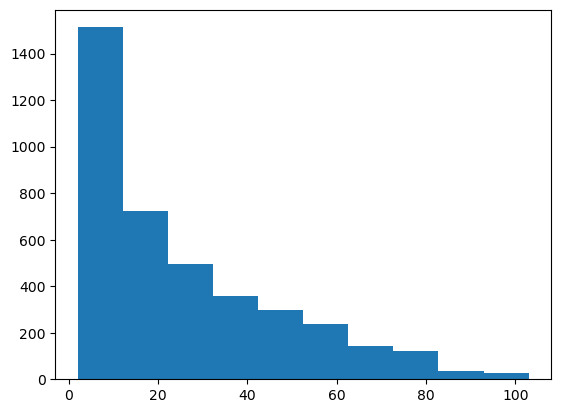

In [23]:
import matplotlib.pyplot as plt

plt.hist(ls)
plt.show()



In [71]:

# load config
import yaml
with open('config/problems/prod.yaml', 'r') as f:
    data_config = yaml.safe_load(f)
with open('config/experiments/expansion.yaml', 'r') as f:
    exp_config = yaml.safe_load(f)

from src.loader.data_format.processors.expansion import ExtractKLeadingTermsProcessor
from src.loader.data_format.processors.subprocessors import MonomialProcessorPlus


num_leading_terms_F, num_leading_terms_V = 1, 1
num_variables = config['ring']['num_variables']
max_degree = 20
field_order = config['field']['param']

# set up vocab and tokenizer
# data path
# test_data_path  = f"/app/data/expansion/GF31_n={num_variables}/test"

data_collator_name = 'monomial'

_processors = []
# separator, supersparator = ' [SEP] ', ' [BIGSEP] '
# _processors.append(ExtractKLeadingTermsProcessor(num_leading_terms_F, num_leading_terms_V, separator=separator, supersparator=supersparator))

subprocessors = {}
subprocessors['monomial_ids'] = MonomialProcessorPlus(
            num_variables=num_variables,
            max_degree=max_degree,
            max_coef=int(field_order)  # 'GF7' -> 7
        )

processor = ProcessorChain(_processors) 

# load test dataset
test_dataset, data_collator = load_data(
    data_path=test_data_path,
    processor=processor,
    subprocessors=subprocessors,
    splits=[{"name": "test", "batch_size": 32, "shuffle": False}],
    tokenizer=tokenizer,
    return_dataloader=False,
    data_collator_name=data_collator_name
)

In [72]:
from torch.utils.data import DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=data_collator)

batch = next(iter(test_dataloader))

Exception: WordLevel error: Missing [UNK] token from the vocabulary

In [51]:
# attribute_batch[0] =  test_dataset[:4]['target']
tokenizer([test_dataset[0]], padding='longest', return_tensors='pt')

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

(array([ 686., 1273.,  727.,  556.,  292.,  191.,  111.,   64.,    9.,
          45.]),
 array([ 15. ,  39.8,  64.6,  89.4, 114.2, 139. , 163.8, 188.6, 213.4,
        238.2, 263. ]),
 <BarContainer object of 10 artists>)

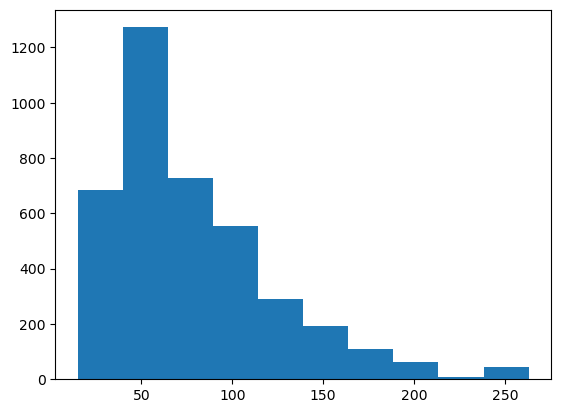

In [43]:
input_monomial_ids_lengths = [len(sample['input_monomial_ids']) for sample in test_dataset]
target_monomial_ids_lengths = [len(sample['target_monomial_ids']) for sample in test_dataset]

plt.hist(input_monomial_ids_lengths)

In [57]:
id = 230

trainset_V = [train_sample['input'].split(' [BIGSEP] ') for train_sample in train_dataset]
testset_V = [test_sample['input'].split(' [BIGSEP] ') for test_sample in test_dataset]

In [58]:
for test_V in enumerate(testset_V):
    print(test_V in trainset_V)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [15]:
Ls_input = []
Ls_target = []
for sample in test_dataset:
    length_input = len(sample['input'].split())
    length_target = len(sample['target'].split())
    Ls_input.append(length_input)
    Ls_target.append(length_target)
    # print(length)
    # print(len(sample['target'].split()))


In [21]:
import numpy as np
Ls_input = np.array(Ls_input)
Ls_target = np.array(Ls_target)

print(f'input: {np.max(Ls_input)}, {np.mean(Ls_input):.1f}, {np.std(Ls_input):.1f}')
print(f'target: {np.max(Ls_target)}, {np.mean(Ls_target):.1f}, {np.std(Ls_target):.1f}')

input: 126004, 9539.8, 10897.5
target: 37654, 3497.9, 4147.0


In [22]:
input_text

'C28 E1 E2 E1 + C2 E0 E3 E1 + C30 E1 E2 E0 + C12 E0 E3 E0 + C1 E1 E0 E2 + C5 E2 E0 E0 + C30 E1 E1 E0 + C25 E0 E2 E0 + C21 E1 E0 E1 + C10 E0 E1 E1 + C15 E0 E0 E2 + C4 E0 E1 E0 + C14 E0 E0 E1 [SEP] C10 E2 E3 E0 + C26 E3 E1 E1 + C25 E2 E0 E3 + C19 E1 E3 E0 + C7 E0 E4 E0 + C6 E2 E1 E1 + C15 E1 E2 E1 + C5 E2 E0 E2 + C15 E1 E1 E2 + C11 E1 E0 E3 + C2 E0 E1 E3 + C17 E3 E0 E0 + C2 E2 E1 E0 + C24 E1 E2 E0 + C15 E0 E3 E0 + C20 E2 E0 E1 + C8 E1 E1 E1 + C1 E0 E2 E1 + C7 E1 E0 E2 + C11 E0 E1 E2 + C23 E0 E0 E3 + C24 E2 E0 E0 + C17 E1 E1 E0 + C16 E0 E2 E0 + C27 E1 E0 E1 + C19 E0 E1 E1 + C20 E0 E0 E2 + C16 E1 E0 E0 + C24 E0 E1 E0 + C18 E0 E0 E1 + C11 E0 E0 E0 [SEP] C26 E1 E3 E1 + C7 E1 E3 E0 + C30 E0 E4 E0 + C22 E2 E1 E1 + C23 E1 E2 E1 + C5 E0 E3 E1 + C14 E2 E0 E2 + C27 E1 E1 E2 + C23 E0 E2 E2 + C24 E1 E0 E3 + C10 E0 E1 E3 + C23 E0 E0 E4 + C30 E2 E1 E0 + C10 E1 E2 E0 + C26 E0 E3 E0 + C20 E2 E0 E1 + C7 E1 E1 E1 + C18 E0 E2 E1 + C2 E1 E0 E2 + C26 E0 E0 E3 + C3 E2 E0 E0 + C1 E1 E1 E0 + C22 E0 E2 E0 + C5 E

In [65]:
from src.loader.data_format.processors.subprocessors import MonomialProcessorPlus

mpp = MonomialProcessorPlus(num_variables=config['ring']['num_variables'], max_degree=config['polynomial']['max_degree'], max_coef=100)


input_texts = [sample['input'] for sample in test_dataset]
processed_input_text = mpp(input_texts)

max_length_base: 126004
max_length_monomial: 226


In [39]:
input_text[-50:]

'E0 E0 + C24 E0 E1 E0 + C28 E0 E0 E1 + C14 E0 E0 E0'

In [52]:
len(processed_input_text)
sum([len(tt) for tt in processed_input_text])

888

In [53]:
input_text.count('+')

843

In [57]:
(Ls_input[0] - input_text.count('+')) // 3

532

In [64]:
counter = 0
for test in input_text.split(' [BIGSEP]'):
    for test2 in test.split(' [SEP] '):
        counter += len(test2.split(' + '))
counter

888

### Retrieve SageMath objects

In [18]:
from sage.all import *
from src.dataset.processors.utils import sequence_to_poly, poly_to_sequence, get_field

field_name = f"{config['field']['type']}{config['field']['param']}"
field = get_field(field_name)
# ring = PolynomialRing(field, ['x', 'y', 'z'], order='degrevlex')
ring = PolynomialRing(field, 'x', config['ring']['num_variables'], order='degrevlex')

F = [sequence_to_poly(f_text, ring) for f_text in input_text.split(' [SEP] ')]
BB = [sequence_to_poly(g_text, ring) for g_text in target_text.split(' [SEP] ')]

In [19]:
ideal(BB).variety()

[{x2: 29, x1: 15, x0: 8}, {x2: 26, x1: 10, x0: 28}, {x2: 14, x1: 22, x0: 30}]

In [20]:
ideal(BB) == ideal(F)

True

### Run border basis calculator

In [21]:
%%time 
from src.border_basis_lib.improved_border_basis import ImprovedBorderBasisCalculator

calculator = ImprovedBorderBasisCalculator(ring, corollary_23=True, N=100, save_universes=True, verbose=False)

use_fast_elimination = True  # use gaussian_elimination_fast
lstabilization_only = False  # only compute L-stable span

G, O, _ = calculator.compute_border_basis_optimized(F,
                                            use_fast_elimination=use_fast_elimination,
                                            lstabilization_only=lstabilization_only)

calculator.datasets[0][0]

CPU times: user 121 ms, sys: 0 ns, total: 121 ms
Wall time: 120 ms


[[x0^2*x2^2,
  x1*x2^4,
  x0^3*x1*x2,
  x0*x1^2*x2^3,
  x1^4*x2^2,
  x0*x1^3*x2^2,
  x1^5*x2,
  x0*x1^4*x2,
  x0^2*x1^3*x2,
  x1^6,
  x0^3*x1^3],
 [x1^6 - 10*x0^2*x1^3*x2 - 9*x0*x1^4*x2 + 8*x1^5*x2 + 15*x0*x1^3*x2^2 + 10*x1^4*x2^2 + x0*x1^4 + 14*x1^5 + 4*x0*x1^3*x2 + 10*x1^4*x2 + 12*x0*x1^2*x2^2 - 5*x1^3*x2^2 - 9*x0*x1*x2^3 + 14*x1^2*x2^3 + 2*x1*x2^4 - 7*x0*x1^3 - 6*x1^4 + 11*x0^2*x1*x2 - 10*x0*x1^2*x2 - 5*x1^3*x2 - 6*x0*x1*x2^2 + 4*x1^2*x2^2 - 8*x1*x2^3 - 15*x0^2*x1 + 13*x0*x1^2 + 14*x1^3 - 15*x0^2*x2 - 9*x0*x1*x2 - 10*x1^2*x2 + 9*x0*x2^2 - 10*x1*x2^2 - 6*x2^3 + 6*x0*x1 - 13*x1^2 - 15*x0*x2 + 12*x1*x2 - 11*x0 - 3*x1 + 7*x2 + 13,
  x0^3*x1^2 + 7*x0*x1^4 - 2*x0*x1^3*x2 + 14*x1^2*x2^3 + 15*x0^3*x1 - 11*x0*x1^3 - 4*x1^4 - 15*x0^3*x2 - 12*x0*x1^2*x2 + 8*x1^3*x2 + 6*x1^2*x2^2 - 15*x0^3 + 14*x0^2*x1 + 6*x0*x1^2 - 5*x1^3 - 2*x0*x1*x2 - 14*x1^2*x2 - 11*x1*x2^2 + 3*x0^2 + 13*x0*x1 - x1^2 - 7*x1*x2 + 7*x2^2 + 5*x0 - x1 + 7*x2 + 7,
  x0^2*x1^3*x2 - 3*x0*x1^4*x2 + 13*x1^5*x2 + 5*x0*x1^3*x2^2 - 11*

### Get expantion dataset 

In [22]:
'''
    calculator.datasets[0][0] gives
    (L,  # Geneators of the order ideal O(L)
     V,  # Target set of polynomials to span,
     S,  # # List of polynomials that were successfully extended
     )
     
     From this, we construct 
     input: 
     (F, L, V)
     output: 
     (S)  
     
     Note: 
     It would be better to put something like [SUPER_SEP] instead of [SEP] between F, L, V. 
'''


## Get one sample
L, V, S = calculator.datasets[0][0]
inputs = F + L + V
target = S

inputs_text = [poly_to_sequence(f) for f in inputs]
inputs_text = ' [SEP] '.join(inputs_text)
target_text = [poly_to_sequence(f) for f in target]
target_text = ' [SEP] '.join(target_text)

sample_text = ' # '.join([inputs_text, target_text])

sample_text

'C16 E0 E6 E0 + C26 E2 E3 E1 + C11 E1 E4 E1 + C4 E0 E5 E1 + C23 E1 E3 E2 + C5 E0 E4 E2 + C16 E1 E4 E0 + C7 E0 E5 E0 + C2 E1 E3 E1 + C5 E0 E4 E1 + C6 E1 E2 E2 + C13 E0 E3 E2 + C11 E1 E1 E3 + C7 E0 E2 E3 + C1 E0 E1 E4 + C12 E1 E3 E0 + C28 E0 E4 E0 + C21 E2 E1 E1 + C26 E1 E2 E1 + C13 E0 E3 E1 + C28 E1 E1 E2 + C2 E0 E2 E2 + C27 E0 E1 E3 + C8 E2 E1 E0 + C22 E1 E2 E0 + C7 E0 E3 E0 + C8 E2 E0 E1 + C11 E1 E1 E1 + C26 E0 E2 E1 + C20 E1 E0 E2 + C26 E0 E1 E2 + C28 E0 E0 E3 + C3 E1 E1 E0 + C9 E0 E2 E0 + C8 E1 E0 E1 + C6 E0 E1 E1 + C10 E1 E0 E0 + C14 E0 E1 E0 + C19 E0 E0 E1 + C22 E0 E0 E0 [SEP] C20 E3 E2 E0 + C16 E1 E4 E0 + C22 E1 E3 E1 + C1 E0 E2 E3 + C21 E3 E1 E0 + C28 E1 E3 E0 + C13 E0 E4 E0 + C10 E3 E0 E1 + C8 E1 E2 E1 + C5 E0 E3 E1 + C27 E0 E2 E2 + C10 E3 E0 E0 + C1 E2 E1 E0 + C27 E1 E2 E0 + C24 E0 E3 E0 + C22 E1 E1 E1 + C30 E0 E2 E1 + C28 E0 E1 E2 + C29 E2 E0 E0 + C12 E1 E1 E0 + C11 E0 E2 E0 + C15 E0 E1 E1 + C16 E0 E0 E2 + C7 E1 E0 E0 + C11 E0 E1 E0 + C16 E0 E0 E1 + C16 E0 E0 E0 [SEP] C11 E0 

In [23]:
## Collect all samples.

number_of_Lstabspan = len(calculator.datasets)

dataset = []
for i in range(number_of_Lstabspan):
    number_of_Lstabspan_iterations = len(calculator.datasets[i])
    for j in range(number_of_Lstabspan_iterations):
        L, V, S = calculator.datasets[i][j]
        
        inputs = F + L + V
        target = S

        inputs_text = [poly_to_sequence(f) for f in inputs]
        inputs_text = ' [SEP] '.join(inputs_text)
        target_text = [poly_to_sequence(f) for f in target]
        target_text = ' [SEP] '.join(target_text)

        sample_text = ' # '.join([inputs_text, target_text])

        dataset.append(sample_text)

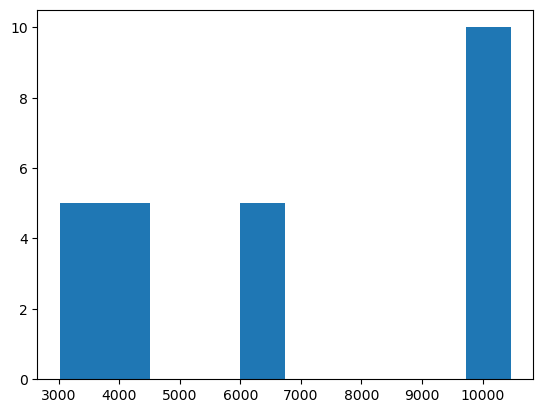

In [24]:
import matplotlib.pyplot as plt

ntokens = [len(sample.split()) for sample in dataset] # The number of tokens

plt.hist(ntokens)
plt.show()


### Examining the number of tokens

In [25]:
L, V, S = calculator.datasets[0][0]

print(f'L: {len(L)}, V: {len(V)}, S: {len(S)}')

L_lengths = [] 
for l in L: 
    length = len(poly_to_sequence(l).split())
    # print(length)
    L_lengths.append(length)

V_lengths = []
for v in V: 
    length = len(poly_to_sequence(v).split())
    # print(length)
    V_lengths.append(length)

S_lengths = []
for s in S: 
    length = len(poly_to_sequence(s).split())
    # print(length)
    S_lengths.append(length)

import numpy as np 
print(f'#tokens in L: {np.mean(L_lengths)}, {np.std(L_lengths)}, {np.min(L_lengths)}, {np.max(L_lengths)}')
print(f'#tokens in V: {np.mean(V_lengths)}, {np.std(V_lengths)}, {np.min(V_lengths)}, {np.max(V_lengths)}')
print(f'#tokens in S: {np.mean(S_lengths)}, {np.std(S_lengths)}, {np.min(S_lengths)}, {np.max(S_lengths)}')


L: 11, V: 8, S: 7
#tokens in L: 4.0, 0.0, 4, 4
#tokens in V: 145.875, 45.957691140874346, 64, 219
#tokens in S: 99.71428571428571, 34.5820526768863, 64, 159


In [12]:
L

[x1^3*x2^2,
 x0*x1^2*x2^2,
 x1^4*x2,
 x0*x1^3*x2,
 x0^2*x1^2*x2,
 x0^3*x1*x2,
 x0^4*x2,
 x1^5,
 x0*x1^4,
 x0^2*x1^3,
 x0^3*x1^2,
 x0^4*x1,
 x0^5,
 x2^6,
 x1*x2^5,
 x0*x2^5,
 x1^2*x2^4,
 x0*x1*x2^4,
 x0^2*x2^4,
 x0^2*x1*x2^3,
 x0^3*x2^3]

In [44]:
V

[x0*x1^4 - 13*x0^4*x2 + 10*x0^3*x1*x2 - 6*x0^2*x1*x2^2 - 6*x0^2*x2^3 + 3*x1^2*x2^3 - 14*x0^4 + 10*x0^3*x1 - 10*x0^2*x1^2 - 12*x0*x1^3 - x0^3*x2 + 15*x0^2*x1*x2 - 3*x0*x1^2*x2 - 11*x1^3*x2 + 4*x0^2*x2^2 + 14*x0*x1*x2^2 + 6*x1^2*x2^2 - 9*x0*x2^3 + 10*x1*x2^3 + 4*x2^4 - x0^3 + 10*x0^2*x1 + 6*x0*x1^2 - 15*x1^3 - 6*x0^2*x2 + 6*x0*x1*x2 + 10*x1^2*x2 - 7*x0*x2^2 + 15*x2^3 + x0^2 - 13*x0*x1 + 5*x1^2 - 4*x0*x2 - 12*x1*x2 + 4*x2^2 - 7*x0 - 5*x1 + 6*x2 + 4,
 x0^2*x1^3 + 2*x0^2*x1^2*x2 - 12*x0^2*x1*x2^2 + 5*x0*x1^2*x2^2 - 15*x1^3*x2^2 - 15*x0^3*x1 - 10*x0^2*x1^2 - 9*x0*x1^3 - 12*x1^4 + x0^2*x1*x2 - 10*x0*x1^2*x2 - 3*x1^3*x2 - 9*x0*x1*x2^2 - 8*x1^2*x2^2 + 5*x0*x2^3 + 2*x1*x2^3 + x0^2*x1 - 13*x0*x1^2 - 3*x1^3 - 11*x0^2*x2 - 7*x0*x1*x2 + 12*x1^2*x2 + 14*x0*x2^2 + 8*x1*x2^2 - x2^3 + 11*x0^2 - 13*x0*x1 - x1^2 - 7*x0*x2 + 4*x1*x2 - 4*x2^2 + 12*x0 - 3*x1 - 2*x2 - 6,
 x0^2*x1^2 + 12*x0*x1^3 + 2*x0^3*x2 + 5*x0*x1^2*x2 - 3*x0^2*x2^2 - 12*x1^2*x2^2 + 9*x0*x2^3 + 4*x0^3 + 6*x0^2*x1 + 12*x0*x1^2 - 15*x1^3 + 2*

In [45]:
BB

[x0^2 + 11*x0 - 12*x1 - 11*x2 + 13,
 x0*x1 + 9*x0 + 8*x1 + 6*x2 - 12,
 x1^2 + 5*x0 - 12*x1 + 8*x2 + 6,
 x0*x2 + 13*x0 + 14*x1 + 12*x2 + 7,
 x1*x2 + 8*x0 + 5*x1 + x2 - 13,
 x2^2 - 14*x0 - 14*x1 + 2*x2 + 5]

In [46]:
G

[x2^2 - 14*x0 - 14*x1 + 2*x2 + 5,
 x1*x2 + 8*x0 + 5*x1 + x2 - 13,
 x0*x2 + 13*x0 + 14*x1 + 12*x2 + 7,
 x1^2 + 5*x0 - 12*x1 + 8*x2 + 6,
 x0*x1 + 9*x0 + 8*x1 + 6*x2 - 12,
 x0^2 + 11*x0 - 12*x1 - 11*x2 + 13]

`BB`: The border basis in the original dataset

`G` : The computed border basis by improved border basis algorithm

- Two bases are different (probably because of some sorting). 
- But they generate the same ideals, so it's fine. 


In [47]:
ideal(G) == ideal(BB)
# ideal(G) == ideal(F)  # also good

True

In [48]:
O

[1, x2, x1, x0]

The order ideal and border basis contains terms upto degree 3. However, `L` and `V` contains very high degree terms -- is that reasonable? 

In [49]:
L

[x2^4,
 x1^2*x2^3,
 x0^2*x2^3,
 x1^3*x2^2,
 x0*x1^2*x2^2,
 x0^2*x1*x2^2,
 x0^2*x1^2*x2,
 x0^3*x1*x2,
 x0^4*x2,
 x0*x1^4,
 x0^2*x1^3,
 x0^4*x1]

In [52]:
from src.border_basis_lib.utils import is_order_ideal

is_order_ideal(L)

False

In [57]:
L, V, S = calculator.datasets[3][0]
L

[x0^3*x1^2,
 x0^2*x1^2*x2^2,
 x0^3*x1*x2^2,
 x0^4*x2^2,
 x1^5*x2,
 x0*x1^4*x2,
 x0^2*x1^3*x2,
 x0^5*x2,
 x1^6,
 x0*x1^5,
 x0^5*x1,
 x0^6,
 x0*x2^6,
 x1^2*x2^5,
 x0*x1*x2^5,
 x0^2*x2^5,
 x1^3*x2^4,
 x0*x1^2*x2^4,
 x0^2*x1*x2^4,
 x0^3*x2^4,
 x1^4*x2^3,
 x0*x1^3*x2^3]